### This code identifies the regions of the genome that are completely differentially methylated between Occipital Frontal Cortex endos and Blood

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pyreadr

In [9]:
# Read in Blood samples_sheet
blood_sample_info = pd.read_csv("/Volumes/Research_Data/Research_Data/Blood Sperm/Blood/Blood_info.csv.csv",header=0,index_col=0)
blood_sample_info.iloc[:]

# Read in blood beta values
blood_beta_vals = pd.read_csv("/Volumes/Research_Data/Research_Data/Blood Sperm/Blood/blood_betas.csv",header=0,index_col=0)
blood_beta_vals.iloc[:]

# Read in endo sample_sheet
endo_sample_info = pd.read_csv("/Users/chadpollard/Desktop/Endometrial_Tissue/Letourneau_MethylationEPIC_20201007/SampleSheet-Letourneau_MethylationEPIC_20201007.csv",header=0,index_col=0)
endo_sample_info.iloc[:]

# Read in endo Beta Values
endo_beta_vals = pd.read_csv("/Users/chadpollard/Desktop/Endometrial_Tissue/Letourneau_MethylationEPIC_20201007/Letourneau_MethylationEPIC_20201007_beta_values.csv",header=0,index_col=0)
endo_beta_vals.iloc[:]

,204668830012_R01C01,204668830012_R02C01,204668830012_R03C01,204668830012_R04C01,204668830012_R05C01,204668830012_R06C01,204668830012_R07C01,204668830012_R08C01,204848060031_R01C01,204848060031_R02C01,...,204848060031_R07C01,204848060031_R08C01,204848060060_R01C01,204848060060_R02C01,204848060060_R03C01,204848060060_R04C01,204848060060_R05C01,204848060060_R06C01,204848060060_R07C01,204848060060_R08C01
cg18478105,0.021235,0.015982,0.030057,0.021355,0.010386,0.020013,0.024182,0.018922,0.008713,0.017553,...,0.034648,0.030648,0.025147,0.027283,0.022521,0.024334,0.009343,0.020503,0.031511,0.022176
cg09835024,0.013875,0.041711,0.055016,0.026186,0.038565,0.094831,0.033304,0.052578,0.010804,0.045821,...,0.164012,0.041712,0.050446,0.024764,0.013507,0.085103,0.033403,0.061289,0.032590,0.019066
cg14361672,0.374347,0.335959,0.374535,0.458592,0.386232,0.471619,0.336853,0.262158,0.263961,0.343299,...,0.390399,0.409974,0.347630,0.356378,0.666624,0.528485,0.323055,0.596134,0.243059,0.280375
cg01763666,0.724893,0.743267,0.861989,0.771949,0.752197,0.797993,0.878376,0.846344,0.862374,0.866100,...,0.808161,0.794520,0.592311,0.820806,0.600896,0.629720,0.755197,0.563436,0.854682,0.824398
cg12950382,0.938472,0.893281,0.937109,0.896365,0.925226,0.951389,0.921852,0.952565,0.943551,0.947397,...,0.946415,0.937936,0.894379,0.903309,0.917928,0.976246,0.918822,0.887637,0.911071,0.883693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23079522,0.964967,0.886404,0.860858,0.935132,0.912914,0.925383,0.910052,0.901866,0.906481,0.930062,...,0.912425,0.907381,0.924436,0.920818,0.935105,0.932891,0.909574,0.974216,0.905166,0.933419
cg16818145,0.855698,0.829161,0.849556,0.857951,0.844309,0.862158,0.843906,0.893011,0.771637,0.872849,...,0.875389,0.858537,0.809819,0.885676,0.853707,0.878130,0.841342,0.881529,0.850195,0.834328
cg14585103,0.650575,0.703750,0.660096,0.632038,0.681754,0.622585,0.629649,0.751961,0.631958,0.614291,...,0.650091,0.654674,0.628624,0.595325,0.724292,0.689695,0.712422,0.640906,0.661910,0.652775
cg10633746,0.107970,0.131558,0.123576,0.122240,0.110600,0.110117,0.122715,0.105031,0.105604,0.118064,...,0.119313,0.108510,0.086453,0.105131,0.114409,0.113569,0.116495,0.114156,0.097170,0.112079


In [139]:
# Looking at annotated regions

In [10]:
gene_info = pd.read_csv("/Volumes/Research_Data/My_Github/Endometriosis_Analysis/USEQ_Regions_EPIC.txt",sep='\t',header=0)
gene_info.iloc[:]

,CHR,START,STOP,CG,NAME
0,chr20,61847650,61847651,cg18478105,chr20_61846439_61848437
1,chrX,24072640,24072641,cg09835024,chrX_24072414_24073135
2,chr14,93581139,93581140,cg05451842,chr14_93580644_93581879
3,chr16,57865112,57865113,cg14797042,chr16_57864721_57865113
4,chr6,15248173,15248174,cg09838562,chr6_15247815_15249151
...,...,...,...,...,...
455420,chr1,90456596,90456597,cg21822051,chr1_90456081_90457602
455421,chr12,52388360,52388361,cg10615271,chr12_52386656_52388361
455422,chr3,182782277,182782278,cg16818145,chr3_182781611_182783244
455423,chr8,139940608,139940609,cg14585103,chr8_139940608_139940609


In [11]:
result = {}
count = 0

for index in gene_info.index:
    key = gene_info.iloc[index,4]
    value = gene_info.iloc[index,3]

    if key not in result:
        result[key] = [value]
    else:    
        result[key].append(value)

print(len(result))

161380


In [12]:
# Calculates the mean beta value for all blood samples at all promoters
blood_df=pd.DataFrame()
for key in result:
    beta_key = blood_beta_vals.loc[result[key],:]
    blood_df[key] = (np.mean(beta_key))

In [13]:
blood_df.iloc[:]

,chr20_61846439_61848437,chrX_24072414_24073135,chr14_93580644_93581879,chr16_57864721_57865113,chr6_15247815_15249151,chr1_144921154_144922187,chr13_114999652_115001387,chr1_110358396_110359536,chr12_101854174_101854175,chr12_92379065_92379066,...,chr2_20629942_20629943,chr20_30158833_30158834,chr12_64927461_64927462,chr2_119189817_119189818,chr3_46415060_46415061,chr19_22063714_22063715,chrX_135574568_135574569,chr5_177759119_177759120,chr2_58110114_58110115,chr8_139940608_139940609
203219670028_R01C01,0.029211,0.058115,0.039773,0.933274,0.031772,0.927657,0.139747,0.905256,0.933344,0.933078,...,0.918709,0.860243,0.731375,0.924092,0.939536,0.869001,0.896007,0.936807,0.602689,0.844640
203219670028_R02C01,0.155264,0.092834,0.170770,0.832052,0.028826,0.939396,0.259378,0.696902,0.657192,0.893919,...,0.878486,0.913877,0.895143,0.880132,0.918912,0.642196,0.898902,0.833600,0.774710,0.805044
203219670028_R03C01,0.032617,0.081254,0.071950,0.922764,0.033829,0.930650,0.117905,0.907068,0.913807,0.941623,...,0.922622,0.859630,0.770510,0.922005,0.922539,0.904265,0.881042,0.884370,0.526957,0.913031
203219670028_R04C01,0.157097,0.083049,0.170318,0.821955,0.023984,0.923426,0.232354,0.715317,0.587660,0.903935,...,0.881589,0.931181,0.902646,0.843522,0.933912,0.650041,0.874020,0.875709,0.820243,0.834949
203219670028_R05C01,0.029771,0.072228,0.037332,0.928932,0.026903,0.914669,0.135207,0.910835,0.916156,0.911487,...,0.912148,0.920881,0.747988,0.908201,0.932236,0.914248,0.879555,0.921719,0.587726,0.891390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203225140170_R04C01,0.165988,0.093876,0.186474,0.847004,0.022312,0.917308,0.278004,0.690140,0.641636,0.895645,...,0.843922,0.880901,0.931485,0.864999,0.917647,0.609251,0.861078,0.860416,0.809721,0.857669
203225140170_R07C01,0.052151,0.091095,0.068930,0.893702,0.032008,0.903648,0.138520,0.878708,0.865456,0.879205,...,0.876770,0.898182,0.806325,0.837374,0.914318,0.864950,0.839745,0.902926,0.652365,0.880661
203225140170_R08C01,0.187860,0.194012,0.212573,0.861005,0.055764,0.946990,0.279572,0.770650,0.752099,0.895491,...,0.924962,0.943450,0.908225,0.900813,0.927340,0.733366,0.910249,0.916398,0.896123,0.855077
203225140175_R05C01,0.037099,0.076066,0.092585,0.867795,0.032831,0.871881,0.146032,0.796644,0.854333,0.813820,...,0.919310,0.864667,0.714616,0.723864,0.915999,0.891231,0.896107,0.945376,0.781062,0.863306


In [14]:
blood_mean_betas = blood_df.mean(axis=0)
blood_mean_betas = blood_mean_betas.to_frame()
blood_mean_betas.columns = ['Mean_of_betas_blood']
blood_mean_betas.iloc[:]

,Mean_of_betas_blood
chr20_61846439_61848437,0.102880
chrX_24072414_24073135,0.095906
chr14_93580644_93581879,0.119144
chr16_57864721_57865113,0.877834
chr6_15247815_15249151,0.031697
...,...
chr19_22063714_22063715,0.759938
chrX_135574568_135574569,0.872751
chr5_177759119_177759120,0.896194
chr2_58110114_58110115,0.717034


In [15]:
# Calculates the mean beta value for all endo samples at all promoters
endo_df=pd.DataFrame()
for key in result:
    beta_key = endo_beta_vals.loc[result[key],:]
    endo_df[key] = (np.mean(beta_key))

In [16]:
endo_df.iloc[:]

,chr20_61846439_61848437,chrX_24072414_24073135,chr14_93580644_93581879,chr16_57864721_57865113,chr6_15247815_15249151,chr1_144921154_144922187,chr13_114999652_115001387,chr1_110358396_110359536,chr12_101854174_101854175,chr12_92379065_92379066,...,chr2_20629942_20629943,chr20_30158833_30158834,chr12_64927461_64927462,chr2_119189817_119189818,chr3_46415060_46415061,chr19_22063714_22063715,chrX_135574568_135574569,chr5_177759119_177759120,chr2_58110114_58110115,chr8_139940608_139940609
204668830012_R01C01,0.113100,0.097350,0.085092,0.616481,0.021643,0.659609,0.199438,0.572952,0.633960,0.823546,...,0.607724,0.510673,0.680907,0.586131,0.621490,0.485927,0.441422,0.502819,0.325096,0.650575
204668830012_R02C01,0.110874,0.121003,0.092433,0.616859,0.017869,0.710906,0.192342,0.596585,0.461640,0.711178,...,0.650831,0.530066,0.469734,0.574525,0.604060,0.508995,0.497685,0.425398,0.387330,0.703750
204668830012_R03C01,0.122112,0.124022,0.094369,0.653771,0.019985,0.717209,0.204725,0.621487,0.503736,0.715980,...,0.700664,0.619653,0.618413,0.626619,0.627385,0.515327,0.541726,0.441038,0.418707,0.660096
204668830012_R04C01,0.127751,0.120655,0.093383,0.660678,0.026071,0.745404,0.212574,0.598358,0.494196,0.566999,...,0.689671,0.584695,0.550595,0.666783,0.671225,0.490913,0.551602,0.420404,0.442632,0.632038
204668830012_R05C01,0.122666,0.117076,0.091480,0.653771,0.022386,0.726248,0.205464,0.651773,0.464451,0.643118,...,0.742499,0.637573,0.490282,0.695840,0.621986,0.508437,0.517824,0.415974,0.454764,0.681754
204668830012_R06C01,0.122210,0.154040,0.094896,0.418104,0.027621,0.593065,0.210685,0.633905,0.528723,0.758243,...,0.546177,0.462442,0.705385,0.640671,0.570697,0.497480,0.512875,0.507119,0.324609,0.622585
204668830012_R07C01,0.130727,0.109014,0.095115,0.644633,0.031432,0.738292,0.206533,0.610354,0.509770,0.576472,...,0.675559,0.603902,0.583889,0.647662,0.667945,0.599606,0.566874,0.495947,0.463776,0.629649
204668830012_R08C01,0.105058,0.129460,0.064322,0.669998,0.033302,0.740355,0.193036,0.599659,0.429998,0.568716,...,0.733205,0.586183,0.506810,0.725075,0.612822,0.543143,0.521036,0.414280,0.433579,0.751961
204848060031_R01C01,0.119732,0.104218,0.086632,0.647559,0.026340,0.717273,0.193644,0.615526,0.469584,0.504519,...,0.668796,0.607552,0.425165,0.669766,0.617444,0.509975,0.501900,0.461161,0.424652,0.631958
204848060031_R02C01,0.114907,0.103820,0.089975,0.585210,0.021539,0.699093,0.199212,0.581800,0.521933,0.531170,...,0.658586,0.548059,0.468186,0.562825,0.606807,0.414735,0.445417,0.435452,0.396976,0.614291


In [17]:
endo_mean_betas = endo_df.mean(axis=0)
endo_mean_betas = endo_mean_betas.to_frame()
endo_mean_betas.columns = ['Mean_of_betas_endo']
endo_mean_betas.iloc[:]

,Mean_of_betas_endo
chr20_61846439_61848437,0.118565
chrX_24072414_24073135,0.126752
chr14_93580644_93581879,0.091024
chr16_57864721_57865113,0.576019
chr6_15247815_15249151,0.024504
...,...
chr19_22063714_22063715,0.510979
chrX_135574568_135574569,0.517324
chr5_177759119_177759120,0.478440
chr2_58110114_58110115,0.423845


In [18]:
all_betas = pd.merge(endo_mean_betas,blood_mean_betas,left_index=True,right_index=True)
all_betas["Delta"] = all_betas.Mean_of_betas_blood - all_betas.Mean_of_betas_endo
all_betas.iloc[:]

,Mean_of_betas_endo,Mean_of_betas_blood,Delta
chr20_61846439_61848437,0.118565,0.102880,-0.015685
chrX_24072414_24073135,0.126752,0.095906,-0.030846
chr14_93580644_93581879,0.091024,0.119144,0.028120
chr16_57864721_57865113,0.576019,0.877834,0.301815
chr6_15247815_15249151,0.024504,0.031697,0.007193
...,...,...,...
chr19_22063714_22063715,0.510979,0.759938,0.248958
chrX_135574568_135574569,0.517324,0.872751,0.355426
chr5_177759119_177759120,0.478440,0.896194,0.417755
chr2_58110114_58110115,0.423845,0.717034,0.293190


In [19]:
small_subset = all_betas[:100]
small_subset = small_subset.sort_values(by=["Delta"],ascending=False)
small_subset.iloc[:]

,Mean_of_betas_endo,Mean_of_betas_blood,Delta
chr8_66877054_66877055,0.382973,0.853461,0.470488
chr16_24110492_24110493,0.391634,0.855560,0.463926
chr20_17299350_17299351,0.314619,0.760596,0.445977
chr5_141659747_141660566,0.409862,0.848095,0.438233
chr5_170323908_170323909,0.504381,0.936233,0.431852
...,...,...,...
chrX_40481859_40483213,0.801176,0.519863,-0.281312
chrX_38659404_38665169,0.422508,0.133856,-0.288652
chr7_4874285_4875095,0.806998,0.503137,-0.303861
chrX_14890405_14891764,0.438560,0.082138,-0.356422


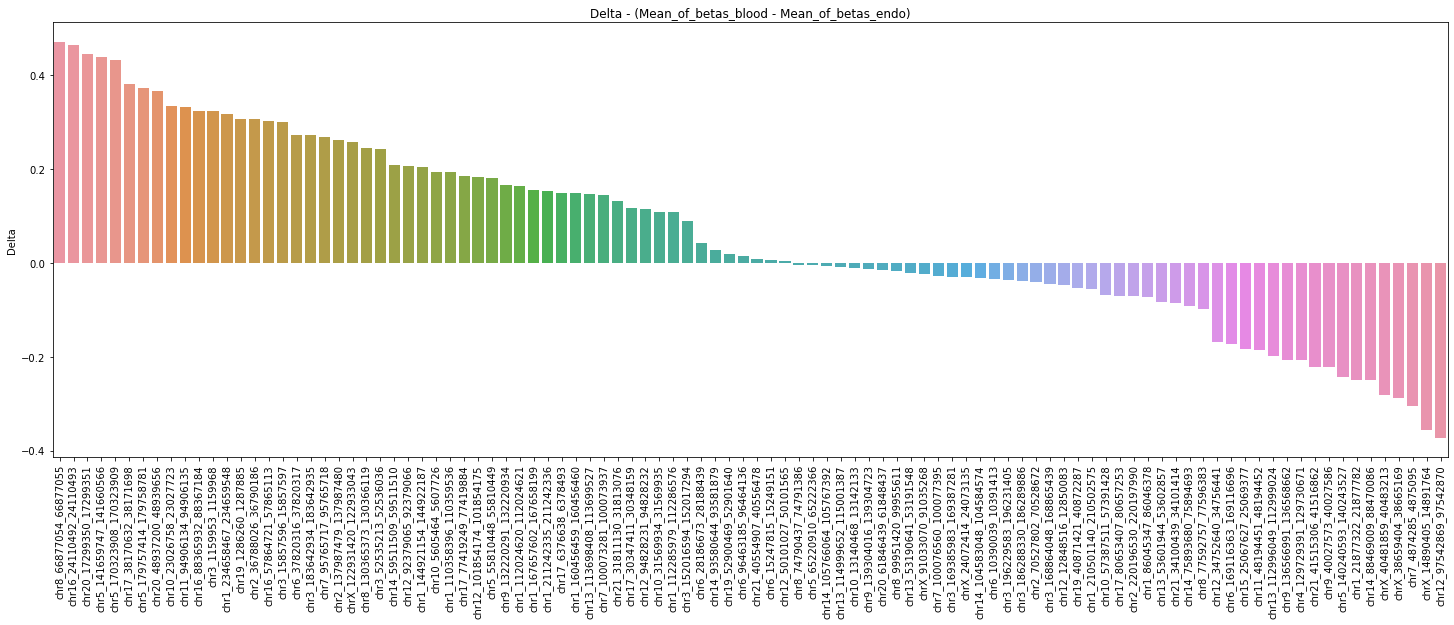

<Figure size 432x288 with 0 Axes>

In [20]:
# scatterplot
plt.figure(figsize=(25,8))
sns.barplot(data=small_subset,x=small_subset.index,y='Delta')
# plt.legend(bbox_to_anchor = (1.25, 0.6))
plt.title('Delta - (Mean_of_betas_blood - Mean_of_betas_endo)')
plt.xticks(rotation=90)
plt.show()
plt.clf()

In [38]:
high_blood_low_endo_methylation = []
high_endo_low_blood_methylation = []
large_delta = []
for promoter in all_betas.index:
    sample = all_betas.loc[promoter,"Delta"]
    if sample > 0.75:
        large_delta.append(promoter)
        high_blood_low_endo_methylation.append(promoter)
    if sample < -0.75:
        large_delta.append(promoter)
        high_endo_low_blood_methylation.append(promoter)
        

In [39]:
print(len(large_delta))
print(len(high_blood_low_endo_methylation))
print(len(high_endo_low_blood_methylation))


173
170
3


In [40]:
high_blood_low_endo_methylation_deltas = all_betas.loc[high_blood_low_endo_methylation,:]
high_blood_low_endo_methylation_deltas = high_blood_low_endo_methylation_deltas.sort_values(by=["Delta"],ascending=False)
high_blood_low_endo_methylation_deltas.iloc[:]

,Mean_of_betas_endo,Mean_of_betas_blood,Delta
chr19_5783127_5783128,0.005616,0.928807,0.923190
chr3_8671361_8671362,0.006651,0.878558,0.871907
chrY_14070990_14070991,0.032571,0.835254,0.802684
chr13_30916564_30916565,0.146561,0.948610,0.802049
chr10_5986488_5986489,0.132931,0.931383,0.798453
...,...,...,...
chr21_33754613_33754614,0.156981,0.907675,0.750694
chr9_98664053_98664054,0.129534,0.880007,0.750472
chr3_176671637_176671638,0.143500,0.893846,0.750346
chr17_65974972_65974973,0.170894,0.921097,0.750203


In [42]:
high_endo_low_blood_methylation_deltas = all_betas.loc[high_endo_low_blood_methylation,:]
high_endo_low_blood_methylation_deltas = high_endo_low_blood_methylation_deltas.sort_values(by=["Delta"],ascending=True)
high_endo_low_blood_methylation_deltas.iloc[:]

,Mean_of_betas_endo,Mean_of_betas_blood,Delta
chr12_9911289_9911290,0.855979,0.043156,-0.812823
chr1_231666092_231666117,0.834542,0.051545,-0.782997
chr4_38763439_38763485,0.834041,0.064659,-0.769382


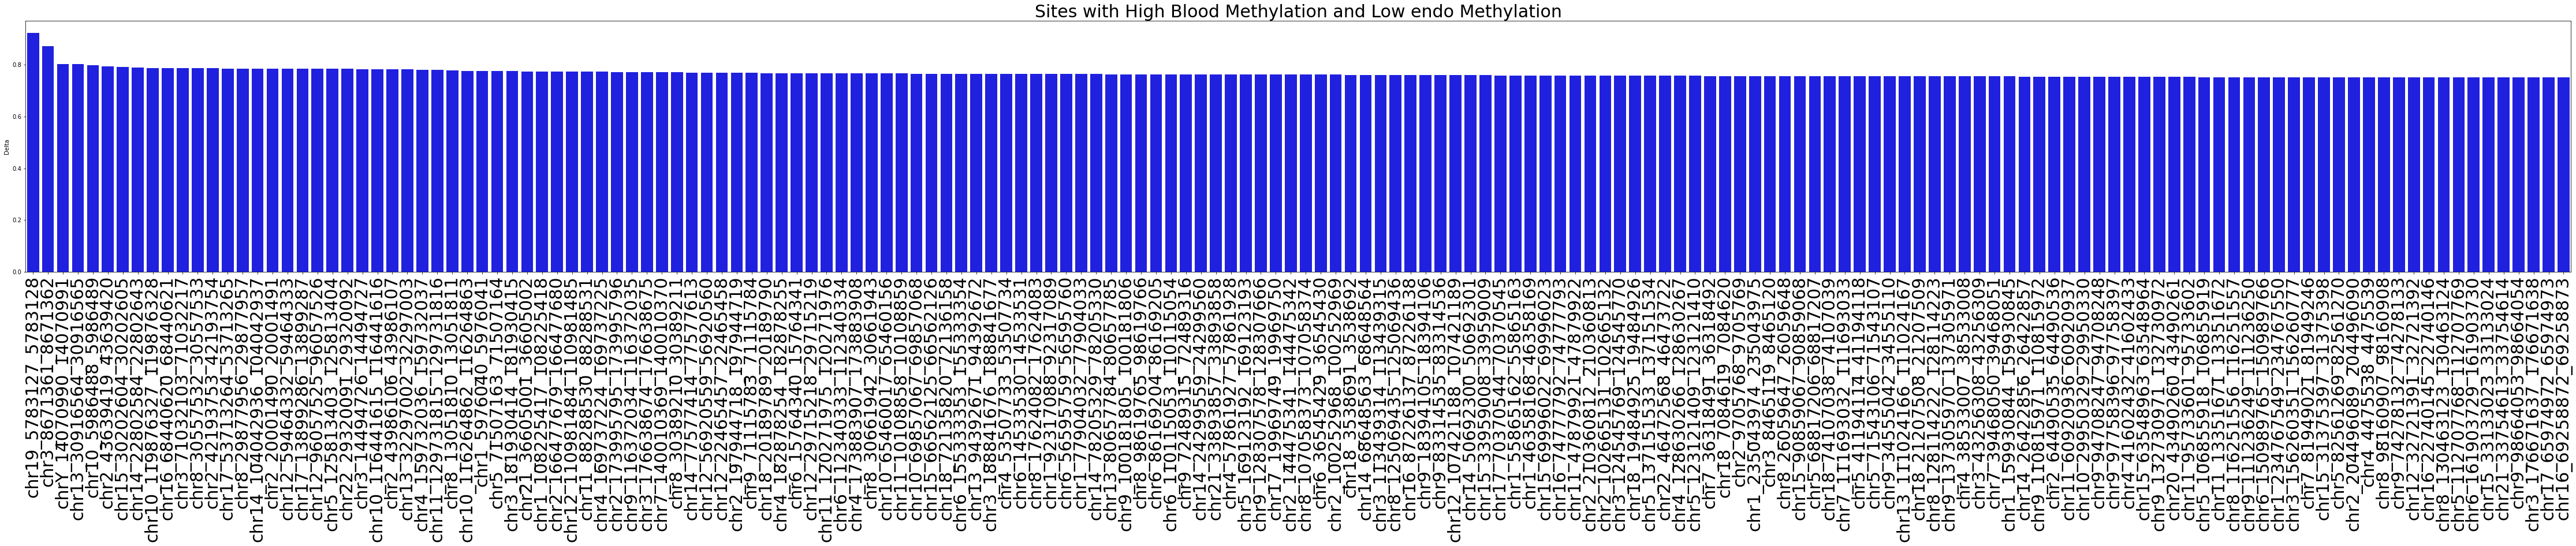

<Figure size 432x288 with 0 Axes>

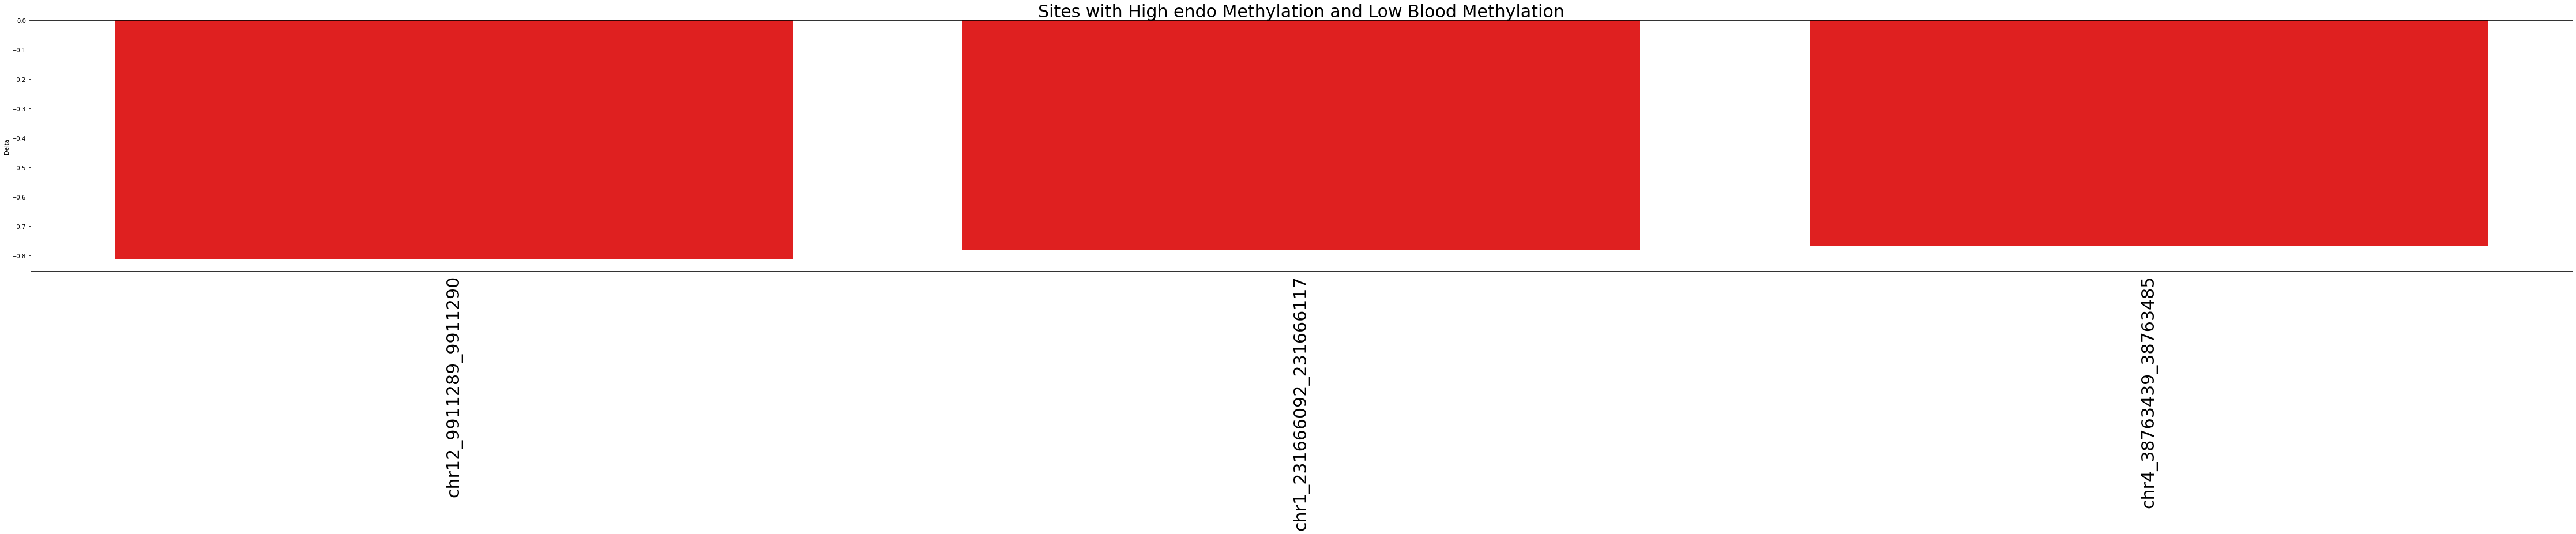

<Figure size 432x288 with 0 Axes>

In [43]:
# scatterplot
plt.figure(figsize=(79,8))
sns.barplot(data=high_blood_low_endo_methylation_deltas,x=high_blood_low_endo_methylation_deltas.index,y='Delta', color = 'blue')
# plt.legend(bbox_to_anchor = (1.25, 0.6))
plt.title('Sites with High Blood Methylation and Low endo Methylation', fontsize = 30)
plt.xticks(rotation=90,fontsize = 30)
plt.show()
plt.clf()

# scatterplot
plt.figure(figsize=(79,8))
sns.barplot(data=high_endo_low_blood_methylation_deltas,x=high_endo_low_blood_methylation_deltas.index,y='Delta', color = 'red')
plt.title('Sites with High endo Methylation and Low Blood Methylation', fontsize = 30)
plt.xticks(rotation=90, fontsize = 30)
plt.show()
plt.clf()

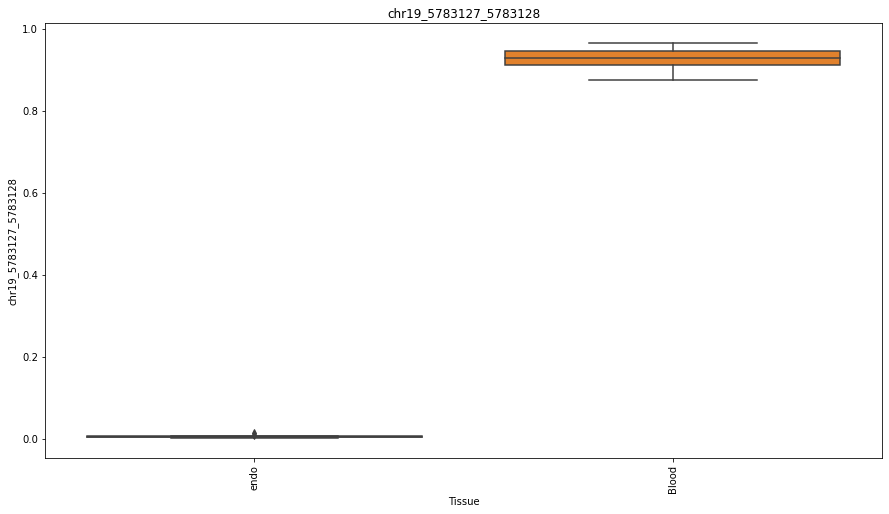

<Figure size 432x288 with 0 Axes>

In [32]:
#Plotting a Random non-significant site
endo_region = endo_df.loc[:,"chr19_5783127_5783128"]
endo_region = pd.DataFrame(endo_region)
endo_region["Tissue"] = "endo"
endo_region.iloc[:]

blood_region = blood_df.loc[:,"chr19_5783127_5783128"]
blood_region = pd.DataFrame(blood_region)
blood_region["Tissue"] = "Blood"
# blood_dlk1.iloc[:]

combined_region = pd.DataFrame()
combined_region = combined_region.append(endo_region)
combined_region = combined_region.append(blood_region)
# dlk1 = pd.append(blood_dlk1)
combined_region.iloc[:]

# scatterplot
plt.figure(figsize=(15,8))
sns.boxplot(data=combined_region,x='Tissue',y='chr19_5783127_5783128')
# plt.legend(bbox_to_anchor = (1.25, 0.6))
plt.title('chr19_5783127_5783128')
plt.xticks(rotation=90)
plt.show()
plt.clf()

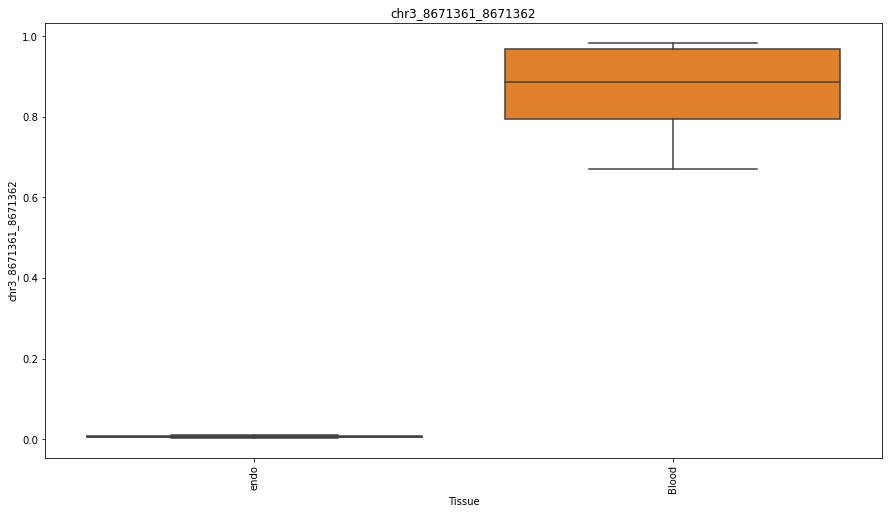

<Figure size 432x288 with 0 Axes>

In [33]:
#Plotting a High Blood Low endo Methylation Site
endo_region = endo_df.loc[:,"chr3_8671361_8671362"]
endo_region = pd.DataFrame(endo_region)
endo_region["Tissue"] = "endo"
endo_region.iloc[:]

blood_region = blood_df.loc[:,"chr3_8671361_8671362"]
blood_region = pd.DataFrame(blood_region)
blood_region["Tissue"] = "Blood"
# blood_dlk1.iloc[:]

combined_region = pd.DataFrame()
combined_region = combined_region.append(endo_region)
combined_region = combined_region.append(blood_region)
# dlk1 = pd.append(blood_dlk1)
combined_region.iloc[:]

# scatterplot
plt.figure(figsize=(15,8))
sns.boxplot(data=combined_region,x='Tissue',y='chr3_8671361_8671362')
# plt.legend(bbox_to_anchor = (1.25, 0.6))
plt.title('chr3_8671361_8671362')
plt.xticks(rotation=90)
plt.show()
plt.clf()

In [ ]:
# Subsetting for high_endo_low_blood_methylation_sites
endo_df_sig = endo_df.loc[:,high_endo_low_blood_methylation_deltas.index]
endo_df_sig["Tissue"] = "endo"

diagnosis_group = endo_sample_info.loc[:,"Category"]
endo_df_sig = pd.merge(endo_df_sig,diagnosis_group, left_index=True, right_index= True)
endo_df_sig.iloc[:]

In [ ]:
# Subsetting for high_blood_low_endo_methylation_site
endo_df_sig = endo_df.loc[:,high_blood_low_endo_methylation_deltas.index]
endo_df_sig["Tissue"] = "endo"

diagnosis_group = endo_sample_info.loc[:,"Category"]
endo_df_sig = pd.merge(endo_df_sig,diagnosis_group, left_index=True, right_index= True)
endo_df_sig.iloc[:]

In [ ]:
# Look at sights with high blood and low endo methylation
for sample in endo_df_sig.index:
    diagnosis = endo_df_sig.loc[sample,"Category"]
    sample_subset = endo_df_sig.loc[sample,:]
    del sample_subset["Tissue"]
    del sample_subset["Category"]
    sample_subset = sample_subset.transpose()
    sample_subset = pd.DataFrame(sample_subset)
    plt.figure(figsize=(79,8))
    sns.barplot(data=high_blood_low_endo_methylation_deltas,x=high_blood_low_endo_methylation_deltas.index,y='Mean_of_betas_blood', color = 'blue')
    sns.barplot(data=high_blood_low_endo_methylation_deltas,x=high_blood_low_endo_methylation_deltas.index,y='Mean_of_betas_endo', color = 'red')
    sns.barplot(data=sample_subset,x=sample_subset.index,y=sample, color = 'green')
    plt.title((sample, diagnosis), fontsize = 30)
    plt.xticks(rotation=90,fontsize = 30)
    plt.ylim()
    plt.show()
    plt.clf()

In [ ]:
# Look at sights with high blood and low endo methylation (Excludes the blood beta values)
for sample in endo_df_sig.index:
    diagnosis = endo_df_sig.loc[sample,"Category"]
    sample_subset = endo_df_sig.loc[sample,:]
    del sample_subset["Tissue"]
    del sample_subset["Category"]
    sample_subset = sample_subset.transpose()
    sample_subset = pd.DataFrame(sample_subset)
    plt.figure(figsize=(79,8))
    # sns.barplot(data=high_blood_low_endo_methylation_deltas,x=high_blood_low_endo_methylation_deltas.index,y='Mean_of_betas_blood', color = 'black')
    sns.barplot(data=high_blood_low_endo_methylation_deltas,x=high_blood_low_endo_methylation_deltas.index,y='Mean_of_betas_endo', color = 'red', alpha = .7)
    sns.barplot(data=sample_subset,x=sample_subset.index,y=sample, color = 'green', alpha = .7)
    plt.title((sample, diagnosis), fontsize = 30)
    plt.xticks(rotation=90,fontsize = 30)
    plt.ylim(0,.2)
    plt.show()
    plt.clf()

# Looking at Significant Sites in Menstrual Blood, Vaginal Fluid (450K)

In [37]:
sample_info = pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Menstrual_Blood_Dataset_1_450K/sample_sheet.csv",header=0,index_col=0)
sample_info.iloc[:4,:]

,Characteristic,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,...,!Sample_contact_email,!Sample_contact_phone,!Sample_contact_department,!Sample_contact_institute,!Sample_contact_address,!Sample_contact_city,!Sample_contact_zip/postal_code,!Sample_contact_country,!Sample_supplementary_file,!Sample_data_row_count
Index,,,,,,,,,,,,,,,,,,,,,
GSM2047255,genomic DNA from menstual blood day1 of 20F15007,GSM2047255,Public on May 14 2016,Jan 27 2016,May 14 2016,genomic,1,menstrual blood of 20F15007,Homo sapiens,age: 19,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577
GSM2047256,genomic DNA from menstual blood day1 of 20F15008,GSM2047256,Public on May 14 2016,Jan 27 2016,May 14 2016,genomic,1,menstrual blood of 20F15008,Homo sapiens,age: 27,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577
GSM2047257,genomic DNA from menstual blood day1 of 30F15005,GSM2047257,Public on May 14 2016,Jan 27 2016,May 14 2016,genomic,1,menstrual blood of 30F15005,Homo sapiens,age: 38,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577
GSM2047258,genomic DNA from menstual blood day2 of 20F15007,GSM2047258,Public on May 14 2016,Jan 27 2016,May 14 2016,genomic,1,menstrual blood of 20F15007,Homo sapiens,age: 19,...,hylee192@snu.ac.kr,-9012,Forensic Medicine,Seoul National University College of Medicine,"103 Daehak-ro, Jongno-gu",Seoul,3080,South Korea,NONE,485577


In [35]:
beta_values =  pd.read_csv("/Volumes/Research_Data/Research_Data/Endometrial_Tissue/Menstrual_Blood_Dataset_1_450K/beta_values.csv",header=0,index_col=0)
beta_values.iloc[:]

,GSM2047255,GSM2047256,GSM2047257,GSM2047258,GSM2047259,GSM2047260,GSM2047261,GSM2047262,GSM2047263,GSM2047264,GSM2047265,GSM2047266
cg00000029,0.193516,0.316101,0.297553,0.279347,0.201705,0.332769,0.197528,0.133294,0.319709,0.274906,0.222651,0.211525
cg00000108,0.905117,0.868701,0.892518,0.907087,0.907626,0.905895,0.880346,0.886982,0.938333,0.911623,0.918655,0.936752
cg00000109,0.749245,0.813102,0.823255,0.874487,0.847039,0.794252,0.789954,0.850374,0.820263,0.851583,0.805761,0.869132
cg00000165,0.123306,0.091243,0.126492,0.138177,0.118035,0.144878,0.098264,0.114480,0.119769,0.108258,0.126656,0.125423
cg00000236,0.628419,0.612886,0.644054,0.648814,0.727337,0.616044,0.615429,0.739506,0.639190,0.672183,0.726084,0.757650
...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.97129969R,0.027964,0.021541,0.023399,0.037135,0.020097,0.016792,0.024735,0.031537,0.042047,0.025863,0.029169,0.039234
ch.X.97133160R,0.046754,0.041344,0.025684,0.042872,0.039558,0.037687,0.032238,0.039324,0.044178,0.028578,0.049956,0.062132
ch.X.97651759F,0.026657,0.016855,0.028813,0.034065,0.022291,0.025158,0.027338,0.029509,0.032387,0.025447,0.022642,0.029919
ch.X.97737721F,0.062451,0.071105,0.079862,0.080839,0.072799,0.061952,0.059694,0.062522,0.076324,0.079539,0.075146,0.060256


In [51]:
# # Find Overlap between EPIC significant sites and 450K array probes
# significant_dmr = gene_info.iloc[:]
# significant_dmr.index = significant_dmr["NAME"]
# significant_dmr = significant_dmr.loc[large_delta,:]
# significant_dmr.iloc[:]

# # Use this file in bedtools intersect
# significant_dmr.to_csv("/Volumes/Research_Data/My_Github/Endometriosis_Analysis/significant_USEQ_dmrs_EPIC.csv")

In [54]:
gene_info_450K = pd.read_csv("/Volumes/Research_Data/My_Github/Endometriosis_Analysis/Significant_USEQ_Regions_450K.txt",sep='\t',header=0)
gene_info_450K.iloc[:]

,CHR,START,STOP,CG,NAME
0,chr1,235043974,235043975,cg20415947,chr1_235043974_235043975
1,chr1,77904032,77904033,cg21546950,chr1_77904032_77904033
2,chr2,100252968,100252969,cg02518546,chr2_100252968_100252969
3,chr2,197944718,197944719,cg02965295,chr2_197944718_197944719
4,chr2,43986106,43986107,cg05939149,chr2_43986106_43986107
5,chr2,173995795,173995796,cg15293629,chr2_173995795_173995796
6,chr2,20001490,20001491,cg16233797,chr2_20001490_20001491
7,chr2,210360812,210360813,cg17875657,chr2_210360812_210360813
8,chr2,9705768,9705769,cg20899781,chr2_9705768_9705769
9,chr3,8671361,8671362,cg02578087,chr3_8671361_8671362


In [56]:
result_450K = {}
count = 0

for index in gene_info_450K.index:
    key = gene_info_450K.iloc[index,4]
    value = gene_info_450K.iloc[index,3]

    if key not in result_450K:
        result_450K[key] = [value]
    else:    
        result_450K[key].append(value)

print(len(result_450K))

57


In [57]:
# Calculates the mean beta value for all menstrual blood samples at all significant regions
menstrual_df=pd.DataFrame()
for key in result_450K:
    beta_key = beta_values.loc[result_450K[key],:]
    menstrual_df[key] = (np.mean(beta_key))
menstrual_df.iloc[:]

,chr1_235043974_235043975,chr1_77904032_77904033,chr2_100252968_100252969,chr2_197944718_197944719,chr2_43986106_43986107,chr2_173995795_173995796,chr2_20001490_20001491,chr2_210360812_210360813,chr2_9705768_9705769,chr3_8671361_8671362,...,chr12_29715218_29715219,chr13_80657784_80657785,chr14_68648563_68648564,chr14_77577414_77577613,chr15_69996022_69996023,chr15_63548963_63548964,chr16_68440620_68440621,chr17_13899286_13899287,chr17_53713264_53713265,chr19_5783127_5783128
GSM2047255,0.509745,0.409676,0.380762,0.380841,0.440993,0.436339,0.368458,0.419839,0.405355,0.582475,...,0.497360,0.418049,0.396769,0.352557,0.371666,0.399512,0.413739,0.445138,0.449511,0.650015
GSM2047256,0.796308,0.641215,0.611050,0.625863,0.765785,0.679568,0.695956,0.649981,0.622192,0.681750,...,0.821185,0.662184,0.676740,0.660429,0.625693,0.628368,0.640223,0.698298,0.769032,0.743240
GSM2047257,0.760727,0.682907,0.668311,0.673754,0.756036,0.712895,0.729769,0.730668,0.678377,0.800928,...,0.764546,0.712022,0.732189,0.735220,0.668712,0.753469,0.685079,0.757660,0.743786,0.752563
GSM2047258,0.716084,0.512129,0.552467,0.531212,0.681010,0.538497,0.594931,0.652533,0.554976,0.705927,...,0.667485,0.624150,0.578707,0.579256,0.479852,0.557257,0.571621,0.624390,0.607446,0.632947
GSM2047259,0.780079,0.364263,0.392097,0.354872,0.727909,0.388304,0.445828,0.435279,0.399498,0.404697,...,0.820571,0.469088,0.387224,0.352208,0.328916,0.362036,0.422602,0.452401,0.696716,0.661163
GSM2047260,0.785289,0.696958,0.673360,0.683086,0.798199,0.763109,0.734334,0.755217,0.707275,0.876410,...,0.812360,0.733253,0.773040,0.754357,0.676276,0.716950,0.735631,0.776797,0.738149,0.724068
GSM2047261,0.823548,0.400628,0.388427,0.367641,0.705330,0.416906,0.500420,0.468484,0.402523,0.483881,...,0.793238,0.521075,0.405211,0.394412,0.308165,0.385194,0.409116,0.452013,0.639838,0.645638
GSM2047262,0.728743,0.261699,0.302046,0.226440,0.668784,0.273166,0.374138,0.334462,0.265861,0.282609,...,0.822920,0.378814,0.288944,0.278728,0.221515,0.242250,0.273106,0.341544,0.682127,0.618074
GSM2047263,0.717133,0.612374,0.609438,0.642972,0.734817,0.706284,0.655375,0.719162,0.650481,0.841280,...,0.774202,0.702907,0.767726,0.688850,0.581870,0.746012,0.673750,0.719742,0.727881,0.689488
GSM2047264,0.870409,0.572082,0.631267,0.549988,0.807036,0.712409,0.681226,0.640627,0.659589,0.708679,...,0.838890,0.679065,0.638416,0.674685,0.538927,0.599002,0.635075,0.681623,0.781941,0.727156
